# <font color = blue> Leer archivos de texto </font>

## Ejemplo 1

Usa `Gtk` para crear interfaz gráfica

In [16]:
Pkg.add("Gtk")

INFO: Package Gtk is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Gtk
INFO: Use `Pkg.update()` to get the latest versions of your packages


Abre una ventana que muestre solo los archivos con la terminación `.txt`
mediante `Gtk.GtkFileChooserDialog` y `Gtk.ShortNames`

In [1]:
using Gtk.GtkFileChooserDialog, Gtk.ShortNames;


(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:186:14: not a number

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:186:14: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:2749:24: not a number

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:2749:24: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:2940:14: not a number

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:2940:14: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:2946:17: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:4083:14: not a number

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:4083:14: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.css:4088:17: Expected a string.

(julia:3875): Gtk-WARNING **: Theme parsing error: gtk-widgets.cs

In [2]:
nombre = open_dialog("Escoge un archivo de texto", Null(), ("*.txt",));

Gtk-Message: GtkDialog mapped without a transient parent. This is discouraged.


Muestra en un arreglo los contenidos del archivo `.txt`

In [3]:
M = readdlm(nombre)

12×5 Array{Any,2}:
  74.3   1  29  15    "52;"
 104.3  11  56   8    "20;"
  87.6  11  31   8    "47;"
  95.9   7  52   6    "33;"
 109.2  11  55   9    "22;"
 102.7   3  71  17    "6;" 
  72.5   1  31  22    "44;"
  93.1   2  54  18    "22;"
 115.9  21  47   4    "26;"
  83.8   1  40  23    "34;"
 113.3  11  66   9    "12;"
 109.4  10  68   8  12     

cambia la última columna 

> arreglos de cadenas $\quad\to\quad$ arreglos de flotantes

In [4]:
m = size(M,1) 
s = ones(m)
for j ∈ 1:m-1
    z = String(M[j,end])
    s[j] = parse(Float64,z[1:end-1])
end
s[end] = 12.0
A = Float64.([M[:,1:end-1] s])

12×5 Array{Float64,2}:
  74.3   1.0  29.0  15.0  52.0
 104.3  11.0  56.0   8.0  20.0
  87.6  11.0  31.0   8.0  47.0
  95.9   7.0  52.0   6.0  33.0
 109.2  11.0  55.0   9.0  22.0
 102.7   3.0  71.0  17.0   6.0
  72.5   1.0  31.0  22.0  44.0
  93.1   2.0  54.0  18.0  22.0
 115.9  21.0  47.0   4.0  26.0
  83.8   1.0  40.0  23.0  34.0
 113.3  11.0  66.0   9.0  12.0
 109.4  10.0  68.0   8.0  12.0

Modifica 1ra columna de $A$ 

In [5]:
A[:,1] = 0.25sum(A[:,2:end],2)
A

12×5 Array{Float64,2}:
 24.25   1.0  29.0  15.0  52.0
 23.75  11.0  56.0   8.0  20.0
 24.25  11.0  31.0   8.0  47.0
 24.5    7.0  52.0   6.0  33.0
 24.25  11.0  55.0   9.0  22.0
 24.25   3.0  71.0  17.0   6.0
 24.5    1.0  31.0  22.0  44.0
 24.0    2.0  54.0  18.0  22.0
 24.5   21.0  47.0   4.0  26.0
 24.5    1.0  40.0  23.0  34.0
 24.5   11.0  66.0   9.0  12.0
 24.5   10.0  68.0   8.0  12.0

Guarda la nueva matriz en otro archivo usando `writedlm`

In [6]:
open("nuevo_datos.txt", "w") do io
    writedlm(io, A,'\t')
end

## Ejemplo 2

**Abre archivo con valores de los píxeles de imagen $256x256$**

**en escala de grises y muestra imagen**

In [8]:
using Images, Colors

INFO: Recompiling stale cache file /home/vanmc/.julia/lib/v0.6/Calculus.ji for module Calculus.
INFO: Recompiling stale cache file /home/vanmc/.julia/lib/v0.6/Interpolations.ji for module Interpolations.
INFO: Recompiling stale cache file /home/vanmc/.julia/lib/v0.6/Images.ji for module Images.


Gtk-Message: GtkDialog mapped without a transient parent. This is discouraged.
INFO: Recompiling stale cache file /home/vanmc/.julia/lib/v0.6/ImageMagick.ji for module ImageMagick.


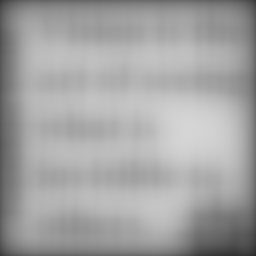

In [9]:
nombre = open_dialog("Escoge un archivo de texto", Null(), ("*.txt",));
M = readdlm(nombre)
I = reshape(M',256,256)'
Gray.(Array{Float64,2}(I))